<img src="assets/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train/Test Split and Bias and Variance


---

### Housekeeping

- Stand-up
- Schedule adjustment

<br />

<img src="assets/updated_schedule.png" style="width: 700px;">

<br />

<a id="learning-objectives"></a>
<a id="learning-objectives"></a>
<a id="learning-objectives"></a>
### Learning Objectives
- Define error due to bias and error due to variance
- Identify the bias-variance trade-off
- Describe what overfitting and underfitting means in the context of model building
- Explain problems associated with over- and underfitting
- Grasp why train/test split is necessary
- Explore k-folds, Leave-One-Out Cross-Validation (LOOCV), and three split methods

<a id="home"></a>

### Lesson Guide
- [a) Bias and Variance Trade-Off](#bias-and-variance-trade-off)
	- [i) Bias? Variance?](#bias-variance)
	- [ii) Exploring the Bias-Variance Trade-Off](#exploring-the-bias-variance-tradeoff)
	- [iii) Brain and Body Weight Mammal Data Set](#brain-and-body-weight-mammal-dataset)
	- [iv) Making a Prediction](#making-a-prediction)
- [b) Making a Prediction From a Sample](#making-a-prediction-from-a-sample)
	- [i) Let's Try Something Completely Different](#lets-try-something-completely-different)
- [c) Balancing Bias and Variance](#balancing-bias-and-variance)
- [d) Train/Test Split](#train-test-split)
	- [i) Evaluation Procedure #1: Train and Test on the Entire Data Set (Do Not Do This)](#evaluation-procedure--train-and-test-on-the-entire-dataset-do-not-do-this)
	- [ii) Problems With Training and Testing on the Same Data](#problems-with-training-and-testing-on-the-same-data)
	- [iii) Evaluation Procedure #2: Train/Test Split](#evaluation-procedure--traintest-split)
	- [iv) Comparing Test Performance With a Null Baseline](#comparing-test-performance-with-a-null-baseline)
- [e) K-Folds Cross-Validation](#k-folds-cross-validation)
	- [i) Leave-One-Out Cross-Validation](#leave-one-out-cross-validation)
	- [ii) Intro to Cross-Validation With the Ames Data](#intro-to-cross-validation-with-the-ames-data)
    - [iii) Exercise: Cross-validation](#cross-validation-exercise)
- [f) Three-Way Data Split](#three-way-data-split)
	- [i) Additional Resources](#additional-resources)
- [g) Train Test Summary](#train_test_summary)

## <font style='color: red'>But first...</font>

### ...where are we in the Data Science Workflow?

<br />

<img src="assets/ds_workflow_interpret.png" style="width: 700px;">

<br />

#### [Home](#home)

<a id="bias-and-variance-trade-off"></a>
# <font style = 'color:blue'>a) Bias and Variance Trade-Off</font>
---



The **bias-variance tradeoff** is widely used in machine learning as a <font style='color: red'>conceptual</font> way of comparing and contrasting different models. 

The question we are interested in is how much we will be able to reduce the expected prediction error, how much does the error depend on the particular model choice and on the available training data. 

Typically, the total expected error can be split into three different parts:



1) **Bias** is error due to the difference between the correct model and the predicted value.  It stems from incorrect model assumptions, for example: Assuming data is linear when it has a more complicated structure.




2) **Variance** is error due to the variability in the prediction due to different training sets.  It stems from being overly sensitive from changes to the training data, for example: Using the training set exactly for a model results in a completely different model -- even if the training set differs only slightly.



3) **Irreducible error** is the error which remains even with the correct model choice and enough representative data.


Bias and Variance are related to the complexity of the chosen model.  

As model complexity **increases**:

- Bias **decreases**. (The model can more accurately model complex structure in data.)

- Variance **increases**. (The model identifies more complex structures, making it more sensitive to small changes in the training data.)


#### [Home](#home)

<a id="bias-variance"></a>
### <font style = 'color:blue'>i) Bias? Variance?</font>

**Conceptual Definitions**
- **Bias**: How close are predictions to the actual values?
  - Roughly, whether or not our model aims on target.
  - If the model cannot represent the data's structure, our predictions could be consistent, but will not be accurate.
- **Variance**: How variable are our predictions?
  - Roughly, whether or not our model is reliable.
  - We will make slightly different predictions given slightly different training sets.

<img src="assets/biasVsVarianceImage.png" width="500">


**Source**: http://scott.fortmann-roe.com/docs/BiasVariance.html

- Visually, we are building a model where the bulls-eye is the goal.
- Each individual hit is one prediction based on our model.
- Critically, the success of our model (low variance, low bias) depends on the training data present.

**Examples of machine learning models:**



- **Linear regression:** Low variance, High bias.
    - If we train with a different subset of the training set, the model will be about the same. Hence, the model has low variance.
    - The resulting model will predict the training points incorrectly (unless they happen to be perfectly linear). Hence, it has high bias.



- **Nearest neighbour:** High variance, Low bias.
    - If we train with a different subset of the training set, the model will make predictions very differently. Hence, the model is highly variable.
    - The resulting model will predict every training point perfectly. Hence, it has low bias.



- **K-Nearest neighbour:** Med-high variance, Med-low bias.
    - The model itself is more robust to outliers, so it will make more predictions the same than before. Hence, it has lower variance than 1-NN.
    - The resulting model no longer predicts every point perfectly, since outliers will be mispredicted. So, the bias will be higher than before.




See if you can figure out:

- **High-order polynomial (as compared to linear regression)**

**Expressing bias and variance mathematically:**

It can be helpful understanding these terms by looking at how we can decompose the total error into them mathematically. (We will skip the derivations!)



In general, we might assume that there is a "true" model $f$ capturing the true relationship between the predictors and the outcome variable. 

On top of this relationship there is some completely random noise component $\epsilon$, for example stemming from a normal distribution with mean zero and standard deviation $\sigma$. 

Then the true relationship takes the form

$$
y = f(x)+\epsilon
$$



By building a model, we try to estimate $f$ by some function $\hat{f}$. We measure the goodness of fit for example by the mean squared error. 

If we are able to guess the right parametrization for $f$, we will get good results if we have enough representative training data, but never better results than the remaining noise level. 

If we did not guess the right functional form for $f$, our predictions will always deviate to some extent from the true values, and the same happens if we do not have enough training data.



Let's define the error of our prediction as the expected value of our squared error. 


Note this error is not based on any particular fitted model, but on the family of potential models given a training set (i.e. all fitted models made from all possible training data samples).

$$E[(y - \hat{f}(x))^2] = {\rm Bias}[\hat{f}(x)]^2 + {\rm Var}[\hat{f}(x)] + \sigma^2$$

This states the expected error is based on only three components: **bias**, **variance**, and **irreducible error**.




Breaking the bias and variance further down:

$${\rm Bias}[\hat{f}(x)] = E[\hat{f}(x) - f(x)].$$

- The bias is the expected difference between our model and the true model.

$${\rm Var}[\hat{f}(x)] = E[\hat{f}(x)^2] - E[\hat{f}(x)]^2.$$

- The variance is how much our predictions vary about the mean across all training sets. ($E[\hat{f}(x)]$ is our predictor's mean prediction.)

- The irreducible error stems from noise in the problem itself.


**Some common questions:**

From the math above, we can answer a few common questions:



***Can a model have high bias given one dataset and low bias for another?***
- Yes. It may happen that on one particular training set a linear model leads to good results, but on another one not.



***Is the MSE for a fitted linear regression the same thing as the bias?***
- Only if there is no noise and no variance. Bias is the expected error of a model averaged across all training sets. This way, if we happen to get a lucky MSE fitting a model on a particular training set, this does not mean we will have a low bias overall.

#### [Home](#home)

<a id="exploring-the-bias-variance-tradeoff"></a>
### <font style = 'color:blue'>ii) Exploring the Bias-Variance Trade-Off</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Allow plots to appear in the notebook.
%matplotlib inline

#### [Home](#home)

<a id="brain-and-body-weight-mammal-dataset"></a>
### <font style = 'color:blue'>iii) Brain and Body Weight Mammal Data Set</font>

This is a [data set](http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt) of the average weight of the body (in kg) and the brain (in g) for 62 mammal species. We'll use this dataset to investigate bias vs. variance. Let's read it into pandas and take a quick look:

In [2]:
path = 'data/mammals.txt'
cols = ['brain','body']
mammals = pd.read_table(path, sep='\t', names=cols, header=0)
mammals.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [3]:
mammals.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


We're going to focus on a smaller subset in which the body weight is less than 200 kg.

In [4]:
# Only keep rows in which the body weight is less than 200 kg
mammals = mammals[mammals.body < 200]
mammals.shape

(51, 2)

We're now going to pretend that there are only 51 mammal species in existence. In other words, we are pretending that this is the entire data set of brain and body weights for **every known mammal species**.

Let's create a scatterplot (using [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/)) to visualise the relationship between brain and body weight:

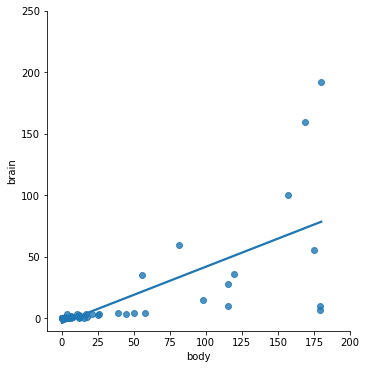

In [58]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

There appears to be a relationship between brain and body weight for mammals.

#### [Home](#home)

<a id="making-a-prediction"></a>
### <font style = 'color:blue'>iv) Making a Prediction</font>

<a id="linear-regression-quick-review"></a>
### Linear Regression: A Quick Review


<img src="assets/linear-residuals.png" width = "800px">
                                                     
                                                    
                                                    


Now let's pretend that a **new mammal species** is discovered. We measure the body weight of every member of this species we can find and calculate an **average body weight of 100 kgs**. We want to **predict the average brain weight** of this species (rather than measuring it directly). How might we do this?

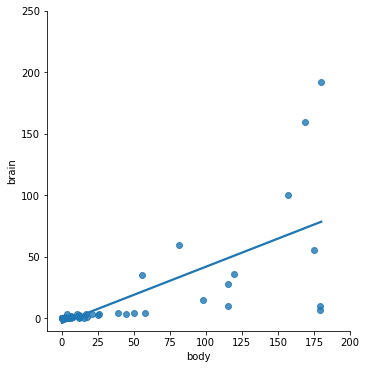

In [8]:

sns.lmplot(x='body', y='brain', data=mammals, ci=None);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

We drew a straight line that appears to best capture the relationship between brain and body weight. So, we might predict that our new species has a brain weight of about 45 g, as that's the approximate y value when x=100.

This is a 'linear model' or 'linear regression model', as we have already seen.

#### [Home](#home)

<a id="making-a-prediction-from-a-sample"></a>
# <font style = 'color:blue'>b) Making a Prediction From a Sample</font>

Earlier, we assumed that this dataset contained every known mammal species. That's very convenient, but **in the real world, all you ever have is a sample of data**. 

This may sound like a contentious statement, but the point of machine learning is to generalise from a sample to the population. 

If you already have data for the entire population, then you have no need for machine learning -- you can apply statistics directly and get optimal answers!



Here, a more realistic situation would be to only have brain and body weights for (let's say) half of the 51 known mammals.

When that new mammal species (with a body weight of 100 kg) is discovered, we still want to make an accurate prediction for its brain weight, but this task might be more difficult, as we don't have all of the data we would ideally like to have.



Let's simulate this situation by assigning each of the 51 observations to **either universe 1 or universe 2**:

In [9]:
# Set a random seed for reproducibility.
np.random.seed(12345)

# Randomly assign every observation to either universe 1 or universe 2.
mammals['universe'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,brain,body,universe
0,3.385,44.5,1
1,0.480,15.5,2
2,1.350,8.1,2
4,36.330,119.5,2
5,27.660,115.0,1


**Important:** We only live in one of the two universes. Both universes have 51 known mammal species, but each universe knows the brain and body weight for different species.

We can now tell Seaborn to create two plots in which the left plot only uses the data from **universe 1** and the right plot only uses the data from **universe 2**:

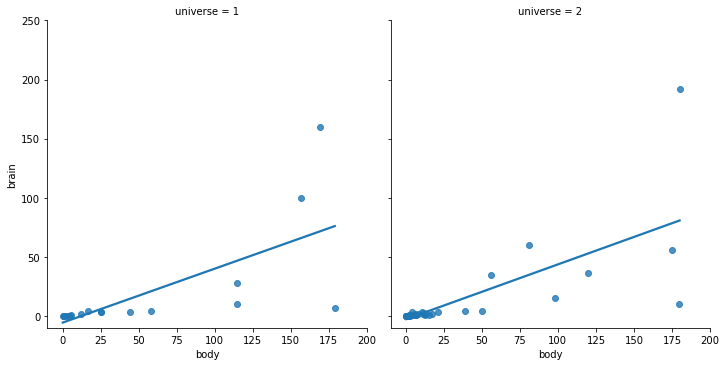

In [10]:
# col='universe' subsets the data by universe and creates two separate plots.
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe');
plt.xlim(-10, 200);
plt.ylim(-10, 250);

The line looks pretty similar between the two plots, despite the fact that they used separate samples of data. In both cases, we would predict a brain weight of about 45 g.

It's easier to see the degree of similarity by placing them on the same plot:

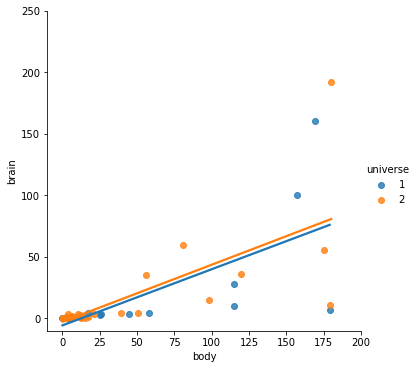

In [11]:
# hue='universe' subsets the data by universe and creates a single plot.
sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='universe');
plt.xlim(-10, 200);
plt.ylim(-10, 250);

So, what was the point of this exercise? This was a visual demonstration of a high-bias, low-variance model.

- It's **high bias** because it doesn't fit the data particularly well.
- It's **low variance** because it doesn't change much depending on which observations happen to be available in that universe.

#### [Home](#home)

<a id="lets-try-something-completely-different"></a>
### <font style = 'color:blue'>i) Let's Try Something Completely Different</font>

What would a **low bias, high variance** model look like? Let's try polynomial regression with an eighth-order polynomial.

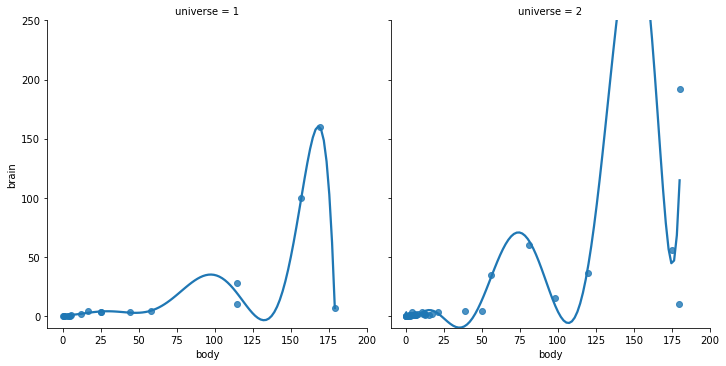

In [12]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe', order=8);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

- It's **low bias** because the models match the data effectively.
- It's **high variance** because the models are very different, depending on which observations happen to be available in that universe. (For a body weight of 100 kg, the brain weight prediction would be 40 kg in one universe and almost 0 kg in the other!)

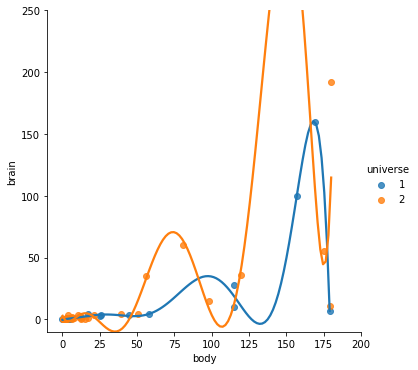

In [13]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='universe', order=8);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

#### [Home](#home)

<a id="balancing-bias-and-variance"></a>
# <font style = 'color:blue'>c) Balancing Bias and Variance</font>


Can we find a middle ground?

Perhaps we can create a model that has **less bias than the linear model** and **less variance than the eighth order polynomial**?

Let's try a second order polynomial instead:

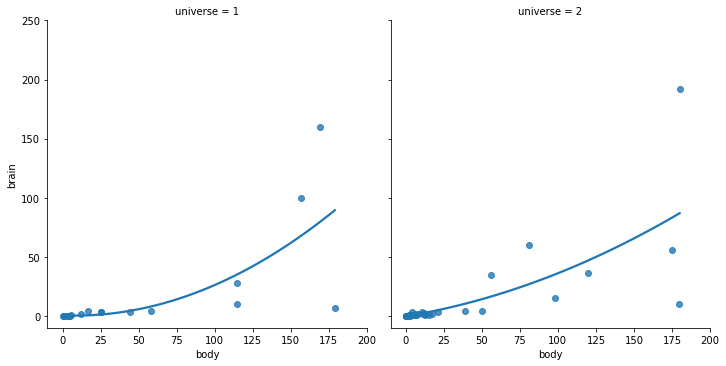

In [14]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe', order=2);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

![Bias-variance tradeoff](./assets/bias_variance.png)

This seems better. In both the left and right plots, **it fits the data well, but not too well**.

This is the essence of the **bias-variance trade-off**: You are seeking a model that appropriately balances bias and variance and thus will generalise to new data (known as "out-of-sample" data).



We want a model that best balances bias and variance. It
should match our training data well (moderate bias) yet be low variance for out-of-sample data (moderate variance).

We want models that are neither underfitting or overfitting.

- if your model has high bias, it is **underfitting** i.e. "not learning enough about your data"

- if your model has high variance, it is **overfitting** i.e. "learning too much about your data"


### Can we obtain a zero-bias, zero-variance model?

No! If there is any noise in the data-generating process, then a zero-variance model would not be learning from the data. 

Additionally, a model only has zero bias if the true relationship between the target and the features is hard-coded into it. 

If that were the case, you wouldn't be doing machine learning -- it would be similar to trying to predict today's temperature by using today's temperature!

#### [Home](#home)

<a id="train-test-split"></a>
# <font style = 'color:blue'>d) Train-test-split</font>

For the rest of the lesson, we will look at three evaluation procedures for predicting model out-of-sample accuracy and trying to help address the risk of overfitting highlighted by the bias / variance trade-off:



-  **Train on the entire dataset**: this should *never* be done to estimate model accuracy on out-of-sample data! After all, training error can be made arbitrarily small or large. 

    - You might train on the entire dataset as the very last step when a model is chosen, hoping to make the final model as accurate as possible. 
    
    - Or, you could use this to estimate the degree of overfitting.


-  **Train-test-split** is useful if cross-validation is not practical (e.g. it takes too long to train). 

    - It is also useful for computing a quick confusion matrix. You could also use this as a final step after the model is finalised (often called evaluating the model against a **validation set**).


- **Cross-validation** is the gold standard for estimating accuracy and comparing accuracy across models.


- **Three-way split** combines cross-validation and the train-test-split. It takes an initial split to be used as a final validation set, then uses cross-validation on the rest.

    - This is the recommended approach.

We run into a problem when powerful models can perfectly fit the data on which they are trained. These models are **low bias** and **high variance**. 

However, we can't observe the variance of a model directly, because we only know how it fits the data we have rather than all potential samples.



**Solution:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

- Before, we have been splitting the data into a **single training group** and a **single test group**.

- Now, to estimate how well the model is likely to perform on out-of-sample data, we will create **many training groups** and **many test groups** then fit **many models**.

**Note:** These procedures can be used with **any machine learning model**.


**The Holdout Method: Train/Test Split**
- **Training set**: Used to train the classifier.
- **Testing set**: Used to estimate the error rate of the trained classifier.


**Advantages**: Fast, simple, computationally inexpensive.

**Disadvantages** Eliminates data, imperfectly splits.

#### [Home](#home)

<a id="evaluation-procedure--train-and-test-on-the-entire-dataset-do-not-do-this"></a>
### <font style = 'color:blue'>i) Evaluation Procedure #1: Train and Test on the Entire Data Set (Do Not Do This)</font>

1. Train the model on the **entire data set**.
2. Test the model on the **same data set** and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

### Load in the data we will use: Ames house price data from Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [3]:
import pandas as pd
import numpy as np

houses = pd.read_csv('data/iowa_houses.csv')

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhood   1460 non-null   object 
 1   LotArea        1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   HouseStyle     1460 non-null   object 
 4   LotFrontage    1201 non-null   float64
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

### Perform basic EDA to make sure the data are in order.

In [5]:
# Drop columns containing text (categories)

houses.drop(['Neighborhood', 'MSZoning', 'HouseStyle'], axis=1, inplace=True)

In [6]:
houses.isnull().sum()

LotArea            0
LotFrontage      259
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
SalePrice          0
dtype: int64

Drop the LotFrontage feature, and drop all rows that have a null value for GarageYrBlt


In [7]:

houses.drop('LotFrontage', axis=1, inplace=True)
houses.dropna(inplace=True)

In [8]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1379 non-null   int64  
 1   OverallQual    1379 non-null   int64  
 2   OverallCond    1379 non-null   int64  
 3   YearBuilt      1379 non-null   int64  
 4   YearRemodAdd   1379 non-null   int64  
 5   TotalBsmtSF    1379 non-null   int64  
 6   1stFlrSF       1379 non-null   int64  
 7   2ndFlrSF       1379 non-null   int64  
 8   LowQualFinSF   1379 non-null   int64  
 9   GrLivArea      1379 non-null   int64  
 10  FullBath       1379 non-null   int64  
 11  HalfBath       1379 non-null   int64  
 12  BedroomAbvGr   1379 non-null   int64  
 13  KitchenAbvGr   1379 non-null   int64  
 14  TotRmsAbvGrd   1379 non-null   int64  
 15  Fireplaces     1379 non-null   int64  
 16  GarageYrBlt    1379 non-null   float64
 17  GarageCars     1379 non-null   int64  
 18  GarageAr

In [9]:
houses.isnull().sum()

LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
SalePrice        0
dtype: int64

In [10]:
houses.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,10695.812183,6.187092,5.577955,1972.958666,1985.435098,1074.445975,1177.129804,353.424946,4.134880,1534.689630,...,1.038434,6.552574,0.641769,1978.506164,1.870921,500.762146,97.456853,47.276287,21.039159,185479.51124
std,10214.702133,1.345780,1.081031,29.379883,20.444852,436.371874,387.014961,439.553171,40.130546,519.140514,...,0.196048,1.589821,0.645985,24.689725,0.630055,185.680520,126.699192,65.210465,60.535107,79023.89060
min,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,438.000000,0.000000,0.000000,438.000000,...,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,35311.00000
25%,7741.000000,5.000000,5.000000,1955.000000,1968.000000,810.000000,894.000000,0.000000,0.000000,1154.000000,...,1.000000,5.000000,0.000000,1961.000000,1.000000,380.000000,0.000000,0.000000,0.000000,134000.00000
50%,9591.000000,6.000000,5.000000,1976.000000,1994.000000,1008.000000,1098.000000,0.000000,0.000000,1479.000000,...,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,27.000000,0.000000,167500.00000
75%,11708.500000,7.000000,6.000000,2001.000000,2004.000000,1314.000000,1414.000000,738.500000,0.000000,1790.000000,...,1.000000,7.000000,1.000000,2002.000000,2.000000,580.000000,171.000000,69.500000,0.000000,217750.00000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,...,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,755000.00000


### Prepare a feature matrix (X) and response (y)  for scikit-learn.

In [11]:
houses.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SalePrice'],
      dtype='object')

In [12]:
# create feature matrix (X)
feature_cols = houses.columns.drop(['SalePrice'])
X = houses[feature_cols]

# create response vector (y)
y = houses.SalePrice


### Import linear regression, instantiate, fit, and preview predictions.

In [13]:
# Import the class.
from sklearn.linear_model import LinearRegression

# Instantiate the model.
lr = LinearRegression()

# Train the model on the entire data set.
lr.fit(X, y)

# Predict the response values for the observations in X ("test the model").
lr.predict(X)

array([211743.35469669, 194489.82820473, 212121.18887095, ...,
       241514.37336219, 127637.03913364, 146409.47766747])

In [15]:
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1379, dtype: int64


### Store the predicted response values.

In [27]:
y_pred = lr.predict(X)

To evaluate a model, we also need an **evaluation metric:**

- A numeric calculation used to **quantify** the performance of a model.
- The appropriate metric depends on the **goals** of your problem.

As we have seen, the most common choices for regression problems are:

- **R-squared**: The percentage of variation explained by the model (a "reward function," as higher is better).  This is the square of the correlation.
- **Root Mean squared error**: The average distance between the prediction and the correct answer (a "loss function", as lower is better).

In this case, we'll use root mean squared error because it is more interpretable in a predictive context.

### Compute root mean squared error using a function from `metrics`.

In [28]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

35878.990973779415


This is known as the **training root mean squared error** because we are evaluating the model based on the same data we used to train the model.

#### [Home](#home)

<a id="problems-with-training-and-testing-on-the-same-data"></a>
### <font style = 'color:blue'>ii) Problems With Training and Testing on the Same Data</font>



- Our goal is to estimate likely performance of a model on **out-of-sample data**.

- But, maximizing the training mean squared error rewards **overly complex models** that won't necessarily generalise.



- Unnecessarily complex models **overfit** the training data.
    - They will do well when tested using the in-sample data.
    - They may do poorly with out-of-sample data.
    - They learn the "noise" in the data rather than the "signal."
    - From Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)

**Thus, the training MSE is not a good estimate of the out-of-sample MSE.**

#### [Home](#home)

<a id="evaluation-procedure--traintest-split"></a>
### <font style = 'color:blue'>iii) Evaluation procedure #2: Train/Test Split</font>

1. Split the data set into two pieces: a **training set** and a **testing set**.

2. Train the model on the **training set**.

3. Test the model on the **testing set** and evaluate how well we did.



Often a good rule-of-thumb is 70% training / 30% test, but this can vary based on the sise of your dataset. 

For example, with a small dataset you would need to use as much training data as possible (in return, your test accuracy will be more variable).



What does this accomplish?

- Models can be trained and tested on **different data** (We treat testing data like out-of-sample data).
- Response values are known for the testing set and thus **predictions can be evaluated**.



This is known as the **testing mean squared error** because we are evaluating the model on an independent "test set" that was not used during model training.

**The testing MSE is a better estimate of out-of-sample performance than the training MSE.**

### Before We Dive Into Train/Test Split, Let's Understand "Unpacking" Syntax

Unpacking in itself allows us to break down the contents of an object and assign it equally to several variables simultaneously.

Let's create a packed object (boxed), then unpack it using a `for` loop.

In [29]:
# Let's start with two lists that are related in some manner.
package = ['package_1','package_2','package_3','package_4']
directions = ['directions_1','directions_2','directions_3','directions_4']

# we'll zip them together to form the associate combos
# We can then use `for Obj-1, Obj-2 in` to isolate the values we need.
for p, d in zip(package, directions):
    print('Shipment: {} | Shipment Contents: {}'.format(p,d))

Shipment: package_1 | Shipment Contents: directions_1
Shipment: package_2 | Shipment Contents: directions_2
Shipment: package_3 | Shipment Contents: directions_3
Shipment: package_4 | Shipment Contents: directions_4


Rather than using a `for` loop to unpack an output, we can simply assign the results, assuming we know exactly how many results need to be assigned. We can think of the result of `zip` as comprising four subcomponents; we can use a `for` loop to help us break the subcomponents out OR use the unpacking method.

In [32]:
box1, box2, box3, box4 = zip(package, directions)

In [33]:
print(box1)
print(box3)

('package_1', 'directions_1')
('package_3', 'directions_3')


In the case of train/test split, we add an unpackaging assignment to the return value of a function, as exemplified by the code below:

In [34]:
# Create a function that takes an argument to act upon. 
def min_max(nums):
    smallest = min(nums)
    largest = max(nums)
    
    # The function returns a list in the order below.
    return [smallest, largest, 5]

We can assign the returned list to a single variable...

In [35]:
# 
min_and_max = min_max([1, 2, 3])

print(min_and_max)
print(type(min_and_max))

[1, 3, 5]
<class 'list'>


 ...OR, because we know the list is composed of three elements, assign each element to its own variable.

In [36]:

the_min, the_max, five = min_max([1, 2, 3])

print(the_max)
print(the_min)
print(five)

3
1
5


### Understanding the `train_test_split` Function

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [38]:
# Before splitting
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

(1379, 22)
(1034, 22)
(345, 22)


Recall that (1,) is a tuple. 

The trailing comma distinguishes it as being a tuple, not an integer.


In [39]:

# Before splitting
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

(1379,)
(1034,)
(345,)


![train_test_split](./assets/train_test_split.png)

### Understanding the `random_state` Parameter

The `random_state` is a pseudo-random number that allows us to reproduce our results every time we run them. However, it makes it impossible to predict what are exact results will be if we chose a new `random_state`.

`random_state` is very useful for testing that your model was made correctly since it provides you with the same split each time. However, make sure you remove it if you are testing for model variability!

WITHOUT a random_state parameter:

(If you run this code several times, you get different results!)

In [43]:
# 
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Print the first element of each object.
print(X_train.head(1))

      LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF  \
1189     7500            7            5       1999          1999          994   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  BedroomAbvGr  \
1189      1028       776             0       1804  ...             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
1189             1             7           1       1999.0           2   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  
1189         442         140           60              0  

[1 rows x 22 columns]


WITH a random_state parameter:

(Same split every time! Note you can change the random state to any integer.)

In [44]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF  \
42     9180            5            7       1983          1983          840   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  BedroomAbvGr  \
42       884         0             0        884  ...             2   

    KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
42             1             5           0       1983.0           2   

    GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  
42         504         240            0              0  

[1 rows x 22 columns]
      LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF  \
1048    21750            5            4       1960          2006            0   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  BedroomAbvGr  \
1048      1771         0             0       1771  ...             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
1048             1             9       

### Introduce Patsy

We will make one more modification. Patsy is a library that allows you to quickly perform simple data transformations in a style similar to R.

Rather than manually creating X and y, we will use the `.dmatricies()` function from Patsy to create the matricies and explore the effect of changing features on training and testing error.

In [45]:
import patsy

#### Step 1: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [46]:
# look at the structure of the dataset for reference

houses.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,8450,7,5,2003,2003,856,856,854,0,1710,...,1,8,0,2003.0,2,548,0,61,0,208500
1,9600,6,8,1976,1976,1262,1262,0,0,1262,...,1,6,1,1976.0,2,460,298,0,0,181500
2,11250,7,5,2001,2002,920,920,866,0,1786,...,1,6,1,2001.0,2,608,0,42,0,223500
3,9550,7,5,1915,1970,756,961,756,0,1717,...,1,7,1,1998.0,3,642,0,35,272,140000
4,14260,8,5,2000,2000,1145,1145,1053,0,2198,...,1,9,1,2000.0,3,836,192,84,0,250000


In [47]:
y, X = patsy.dmatrices("SalePrice ~ GrLivArea + OverallQual + LotArea", data=houses, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#### Step 2: Train the model on the training set.

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Step 3: Test the model on the testing set and check the accuracy.

In [49]:
from sklearn import metrics

y_pred = lr.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

43051.933020078584
37046.18307705864


![](assets/train_test_error.png)

image from [http://machinelearning2010fall.pbworks.com/f/LowBiasHighVarianceFigure2-11ESL.bmp](http://machinelearning2010fall.pbworks.com/f/LowBiasHighVarianceFigure2-11ESL.bmp)

- **Training error**: Decreases as model complexity increases (lower value of k).
- **Testing error**: Is minimised at the optimum model complexity.

#### [Home](#home)

<a id="comparing-test-performance-with-a-null-baseline"></a>
### <font style = 'color:blue'>iv) Comparing Test Performance With a Null Baseline</font>

When interpreting the predictive power of a model, it's best to compare it to a baseline using a dummy model, sometimes called a ZeroR model or a baseline model. 


A dummy model is simply using the mean, median, or most common value as the prediction. 

This forms a benchmark to compare your model against and becomes especially important in classification where your null accuracy might be 95 percent.



For example, suppose your dataset is **imbalanced** -- it contains 99% one class and 1% the other class. 

Then, your baseline accuracy (always guessing the first class) would be 99%. 

So, if your model is less than 99% accurate, you know it is worse than the baseline. 


Imbalanced datasets generally must be trained differently (with less of a focus on accuracy) because of this.



You can alternatively use simple models to achieve baseline results, for example nearest neighbours or a basic unigram bag of words for text data.

### Examine the baseline mean squared error using a null model.

How does this compare to what we achieved with linear regression. Is our model making an actual improvement?

In [50]:
# Use .apply() to broadcast a mean for every prediction.

print(np.sqrt(metrics.mean_squared_error(y_test, y_test.apply(np.mean, result_type='broadcast'))))

74285.99830650231


In [51]:
# you can also use sklearn's Dummy Regressor to do work out the Null baselines e.g.

from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_test, y_test)

print(np.sqrt(metrics.mean_squared_error(y_test, dummy_regr.predict(X_test))))

74285.99830650231


#### [Home](#home)

<a id="k-folds-cross-validation"></a>
# <font style = 'color:blue'>e) K-Folds Cross-Validation</font>
---

Train/test split provides us with helpful tool, but it's a shame that we are tossing out a large chunk of our data for testing purposes.

**How can we use the maximum amount of our data points while still ensuring model integrity?**

1. Split our data into a number of different pieces (folds).
2. Train using `k-1` folds for training and a different fold for testing.
3. Average our model against EACH of those iterations.
4. Choose our model and TEST it against the final fold.
5. Average all test accuracies to get the estimated out-of-sample accuracy.

Although this may sound complicated, we are just training the model on k separate train-test-splits, then taking the average of the resulting test accuracies!


<img src="assets/cross_validation_diagram.png" width = "200px" class="center">


#### [Home](#home)

<a id="leave-one-out-cross-validation"></a>
### <font style = 'color:blue'>i) Leave-One-Out Cross-Validation</font>

A special case of k-fold cross-validation is leave-one-out cross-validation. Rather than taking 5–10 folds, we take a fold of sise `n-1` and leave one observation to test. It is computationally very expensive and suitable for small datasets or when estimated model performance is critical.

Typically, 5–10 fold cross-validaiton is recommended.

#### [Home](#home)

<a id="intro-to-cross-validation-with-the-ames-data"></a>
### <font style = 'color:blue'>ii) Intro to Cross-Validation With the Ames Housing Data</font>

### Create a cross-valiation with five folds.

In [52]:
from sklearn import model_selection

In [53]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

`kf` is an object that contains the indices of the k-splits of data (so the Xs and ys have the same indices, even though the overall folds are random).  We need to use this object to run multiple Linear Regression models, and see what the resulting scores are (note: `.score()` is the R squared score).

Create a for loop to run a Linear Regression model for each split (k-fold) of data, and save the RMSE and R^2 score for the test set in each case.  

Then print those scores out.


In [54]:
rmse_values = []
scores = []
n = 0

for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
    scores.append(lr.score(X, y))
    
    n += 1



In [55]:
print("~~~~ CROSS VALIDATION each fold ~~~~")
for i in range(1, n+1):

    print('Model {}'.format(i))
    print('RMSE: {}'.format(rmse_values[i-1]))
    print('R2: {}\n'.format(scores[i-1]))


~~~~ CROSS VALIDATION each fold ~~~~
Model 1
RMSE: 35108.543516285084
R2: 0.7227621215791175

Model 2
RMSE: 37464.409059453414
R2: 0.7228920481952122

Model 3
RMSE: 51771.72280680449
R2: 0.7218147760156628

Model 4
RMSE: 42063.75289458867
R2: 0.7228310547202548

Model 5
RMSE: 41126.46850621544
R2: 0.7224367168888386



In [56]:
print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))


~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of RMSE for all folds: 41506.97935666942
Mean of R2 for all folds: 0.7225473434798172


We can choose to just get the cross-validated score, and not the individual model scores (you could get exactly the same result as above if you set the random_states to be the same when instantiating KFold)


In [57]:

from sklearn.model_selection import cross_val_score

# Note the results will vary each run since we take a different
#   subset of the data each time (since shuffle=True)
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_root_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

41761.12730820032
0.6895123186825414


<font style='color: green'>**While the cross-validated approach here generated more overall error, which of the two approaches would predict new data more accurately — the single model or the cross-validated, averaged one? Why?**</font>

#### [Home](#home)

<a id="three-way-data-split"></a>
# <font style = 'color:blue'>f) Three-Way Data Split</font>
---



The most common workflow is actually a combination of train/test split and cross-validation. 

We take a train/test split on our data right away and try not spend a lot of time using the testing data set. 

Instead, we take our training data and tune our models using cross-validation. 

When we think we are done, we do one last test on the testing data to make sure we haven't accidently overfit to our training data.



**If you tune hyperparameters via cross-validation, you should never use cross-validation on the same dataset to estimate OOS accuracy!** 

Using cross-validation in this way, the entire dataset was used to tune hyperparameters. 

So, this invalidates our condition above -- where we assumed the test set is a pretend "out-of-sample" dataset that was not used to train our model! 

So, we would expect the accuracy on this test set to be artificially inflated as compared to actual "out-of-sample" data.



Even with good evaluation procedures, it is incredibly easy to overfit our models by including features that will not be available during production or leak information about our testing data in other ways.

<img src="assets/Train-Test-Split-CV.png" width = "500px" class="right">


- If model selection and true error estimates are to be computed simultaneously, three disjointed data sets are best.

    - **Training set**: A set of examples used for learning – what parameters of the classifier?
    - **Validation set**: A set of examples used to tune the parameters of the classifier.
    - **Testing set**: A set of examples used ONLY to assess the performance of the fully trained classifier.
    
- Validation and testing must be separate data sets. Once you have the final model set, you cannot do any additional tuning after testing.

#### Process

1. Divide data into training, validation, and testing sets.
2. Select architecture (model type) and training parameters (k).
3. Train the model using the training set.
4. Evaluate the model using the training set.
5. Repeat 2–4 times, selecting different architectures (models) and tuning parameters.
6. Select the best model.
7. Assess the model with the final testing set.

#### [Home](#home)

<a id="additional-resources"></a>
### <font style = 'color:blue'>Additional Resources</font>
- Excellent article on [Bias Variance](http://scott.fortmann-roe.com/docs/BiasVariance.html)
- University of Washington [slides](https://courses.cs.washington.edu/courses/cse546/12wi/slides/)
- [LOOCV](https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/)

#### [Home](#home)

<a id="train_test_summary"></a>
# <font style = 'color:blue'>g) Train Test Split Summary</font>

In this lab, we compared four methods of estimating model accuracy on out-of-sample data. Throughout your regular data science work, you will likely use all four at some point:

1. **Train on the entire dataset**
2. **Train-test-split**
3. **Cross-validation**
4. **Three-way split**